## Linear Regression using Regular, Ridge and Lasso

#### Explaining the differences

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cd C:\Users\kjosh\Downloads

C:\Users\kjosh\Downloads


In [3]:
pwd

'C:\\Users\\kjosh\\Downloads'

#### Data Setup

In [4]:
df=pd.read_csv("advertising.csv")
df.head(20)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [5]:
# exclude Newspaper
X = df[['TV', 'Radio']]
y = df.Sales

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 2)
(150,)
(50, 2)
(50,)


#### Linear Regression

In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression.

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)
# Getting the R^2 value for the fitted model on Training Set
lr.score(X_train, y_train)

0.8901498098117536

In [8]:
lr.score(X_test, y_test)*100

91.76214942248907

In [9]:
from sklearn import metrics

predictions = lr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.0477590411212603
MSE: 1.926276041866742
RMSE: 1.3879034699382886


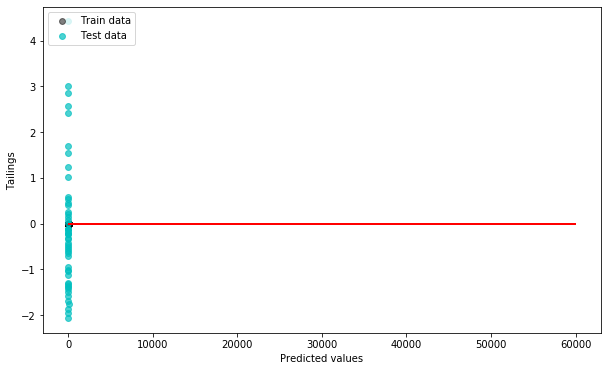

In [10]:
import matplotlib.pyplot as pl

pl.figure(figsize=(10,6))

pl.scatter(y_train,y_train - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(Y_test_pred,Y_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()

#### Ridge Regression

Ridge Regression is a technique for analyzing multiple regression data that suffer from multicollinearity. When multicollinearity occurs, least squares estimates are unbiased, but their variances are large. hence, may be far from the true value.

In [11]:
from sklearn.linear_model import Ridge


rr = Ridge(alpha=0.01) 

rr.fit(X_train, y_train)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

print ("ridge regression train score low alpha: {}".format(Ridge_train_score))
print ("ridge regression test score low alpha: {}".format(Ridge_test_score))
print ("ridge regression train score high alpha: {}".format(Ridge_train_score))
print ("ridge regression test score high alpha: {}".format(Ridge_test_score))

ridge regression train score low alpha: 0.890149809811731
ridge regression test score low alpha: 0.9176214682062241
ridge regression train score high alpha: 0.890149809811731
ridge regression test score high alpha: 0.9176214682062241


In [12]:
from sklearn import metrics

predictions = lr.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.0477590411212603
MSE: 1.926276041866742
RMSE: 1.3879034699382886


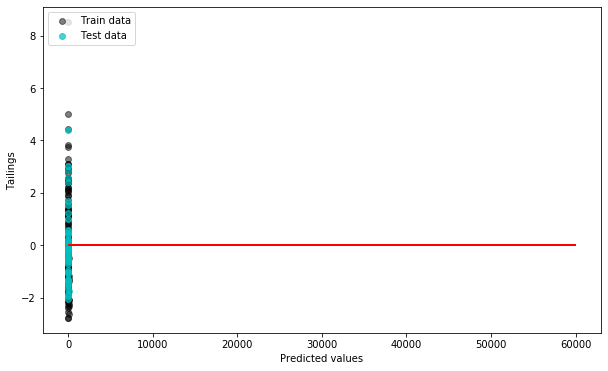

In [13]:
pl.figure(figsize=(10,6))

pl.scatter(Y_train_pred,Y_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(Y_test_pred,Y_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()

#### Lasso Regression

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [14]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)
print ("training score: {}".format(train_score)) 
print ("test score: {}".format(test_score))
print ("number of features used: {}".format(coeff_used))

training score: 0.8899919324480665
test score: 0.9155084347516516
number of features used: 2


In [15]:
from sklearn import metrics

predictions = lasso.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.0601605344514176
MSE: 1.9756862102115291
RMSE: 1.4055910536893472


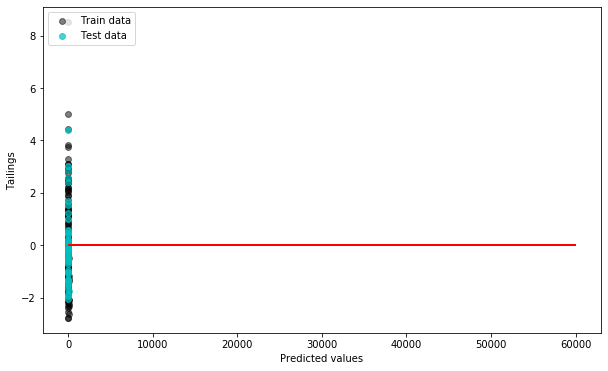

In [16]:
pl.figure(figsize=(10,6))

pl.scatter(Y_train_pred,Y_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
pl.scatter(Y_test_pred,Y_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()

### Conclusion
_______________________________________________________________________________

According to the data provided and the analysis made, we can assume that Ridge regression gives a better accuracy than the other regression types. We also need to check the error for all the regression models as well and see which model fits better for the data set. The scatter plot gives the predicted values to the actual values for both testing and training data.